In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy import stats

<h2 style="color: green;">Basic - 상관 분석</h2>

상관 분석은 두 변수 사이의 관계를 분석하는 방법 중 하나입니다. 두 변수 간에 어떤 종류의 관계가 있는 지를 파악하여, 하나의 변수가 변할 때 다른 변수도 어떻게 변화하는지를 예측할 수 있습니다.
상관 분석은 두 변수 간의 관계를 수치적으로 측정하며, 대표적으로 피어슨 상관 계수를 사용합니다. 피어슨 상관 계수는 -1부터 1까지의 범위를 가지며, 0에 가까울수록 두 변수 간의 관계가 약하고, 1에 가 까울수록 강한 양의 상관 관계가 있고, -1에 가까울수록 강한 음의 상관 관계가 있습니다.


### *상관 계수 - 피어슨 상관 계수*

피어슨 상관 계수는 -1부터 1까지의 범위를 가지며, 두 변수 간의 관계를 수량화하여 표현합니다. 1에 가까울수 록 강한 양의 상관 관계가 있고, -1에 가까울수록 강한 음의 상관 관계가 있으며, 0에 가까울수록 두 변수 간의 상관 관계가 약합니다.

In [7]:
#load tips dataset
tips = sns.load_dataset('tips')

#calculate Pearson correlation coefficient between total_bill and tip
corr = tips['total_bill'].corr(tips['tip'], method='pearson')

print('Pearson correlation coefficient: ', corr)

Pearson correlation coefficient:  0.6757341092113645


### *공분산*

공분산(Covariance)은 두 변수 사이의 상관 관계의 방향과 강도를 나타내는 지표 중 하나입니다. 두 변수가 함께 변화하는 정도를 나타내며, 두 변수가 같은 방향으로 변화하면 양수의 값을, 반대 방향으로 변화하면 음수의 값을 가집니다.

공분산 값이 0이라면 두 변수는 서로 독립적인 관계를 가진다는 것을 의미합니다. 그러나 공분산 값 자체만으로는 두 변수의 상관 관계의 강도를 파악하기 어렵기 때문에, 이를 표준화한 상관계 수인 Pearson 상관계수를 사용하는 것이 일반적입니다.

In [8]:
#공분산 실습
covariance = tips_data['total_bill'].cov(tips_data['tip'])
print(covariance)

8.323501629224854


### *선점도*

산점도(scatter plot)란 두 변수 간의 관계를 시각적으로 나타내는 그래프입니다. 가로축과 세로축에 각각의 변수를 놓고 데이터를 점으로 찍어서 나타냅니다. 일반적으로 x축에는 독립 변수(independent variable), y축에는 종속 변수(dependent variable)를 놓습니다.

### *회귀 직선 소개*

회귀 직선(Regression line)은 산점도 상의 두 변수 간 관계를 표현하기 위해 사용되는 선형 함수입니다. 산점도 상에 분산된 데이터들 사이에서 최대한 데이터를 대표할 수 있는 경향성을 가진 직선을 그리 는 것입니다.

회귀 직선은 y = a + bx 형태로 나타낼 수 있습니다. 여기서 a는 y절편, b는 기울기를 의미합니다. y절편은 x = 0일 때의 y값을 나타내며, 기울기는 x가 1 증가할 때마다 y가 얼마나 증가하는지를 나타냅니다.

회귀 직선은 주로 선형 회귀 분석(linear regression analysis)에서 사용되며, 예측 모델링에서도 자주 활 용됩니다. 이를 통해 예측하고자 하는 값과 다른 변수들 간의 상관 관계를 파악하고, 적절한 예측 모 델을 만들어 내는 것이 가능합니다.

In [3]:
#load data
tips_data = sns.load_dataset('tips')
print(tips_data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [5]:
corr = tips_data[['total_bill', 'tip']].corr()
print(corr)

            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


<Axes: xlabel='total_bill', ylabel='tip'>

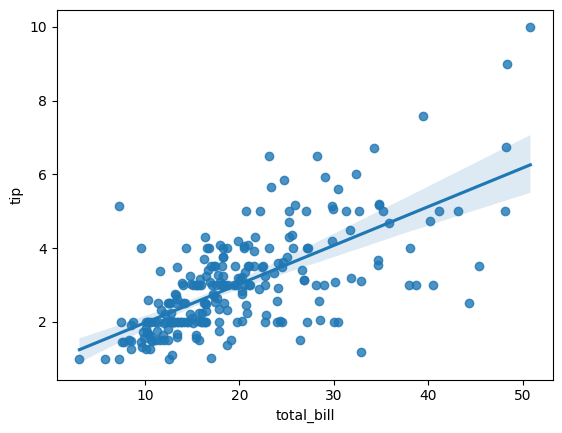

In [6]:
sns.regplot(x='total_bill', y='tip', data=tips_data)

### *상관 관계 유형*

+ 선형관계:두변수간에직선형태로관계가있는경우를말합니다.이때상관계수를구할수 있습니다. 상관 계수는 -1에서 1사이의 값을 가지며, 1에 가까울수록 강한 양의 상관 관계, -1 에 가까울수록 강한 음의 상관 관계, 0에 가까울수록 상관 관계가 없다는 것을 나타냅니다.

+ 비선형관계:두변수간의관계가직선이아닌곡선형태로나타나는경우를말합니다. 비선형 관계는 선형 관계와는 달리 상관 계수로 측정하기 어려우며, 다른 방법으로 분석 해야 합니다. 예를 들어 곡선 형태의 상관 관계에서는 로지스틱 회귀나 다항 회귀 등을 사 용할 수 있습니다.

In [17]:
#선형 관계 데이터 생성
x_linear = np.linspace(0,10,100)
y_linear = 2 * x_linear + 1

#print(x_linear, y_linear)
x_nonlinear = np.linspace(-10,10,100)
y_nonlinear = x_nonlinear ** 2

#print(x_nonlinear, y_nonlinear)

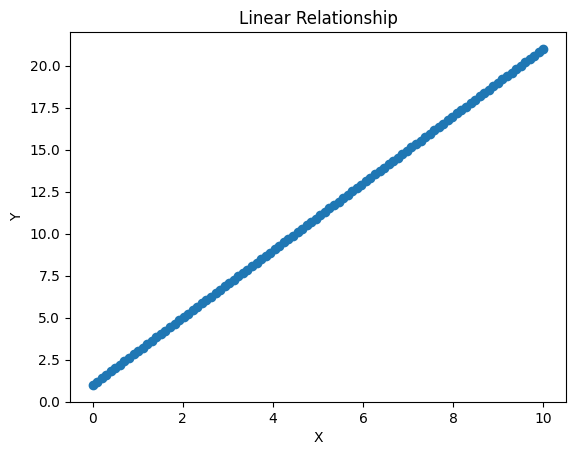

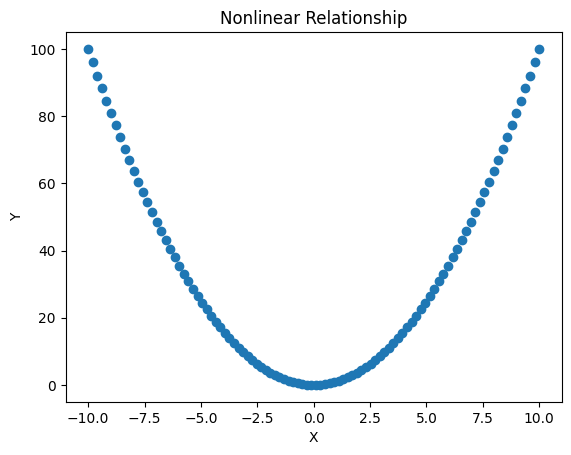

In [18]:
# 선형 관계 시각화
plt.scatter(x_linear, y_linear)
plt.title('Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# 비선형 관계 시각화
plt.scatter(x_nonlinear, y_nonlinear)
plt.title('Nonlinear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### *다중 상관 분석*

다중 상관 분석(Multiple Correlation Analysis)은 두 개 이상의 독립 변수와 하나의 종속 변수 사이의 상관 관계를 분석하는 방법입니다.

선형 회귀 분석에서는 하나의 종속 변수와 하나의 독립 변수 사이의 상관 관계만을 분석합니다.
하지만 다중 회귀 분석에서는 두 개 이상의 독립 변수가 종속 변수에 미치는 영향력을 동시에 분석합니다. 이때각독립변수들은서로독립적이어야합니다.

In [9]:
#titanic 데이터셋에서 일부 변수 선택
cols = ["survived", "pclass", "age", "fare"]

#새로운 데이터프레임 생성
df = sns.load_dataset("titanic")[cols].dropna()
print(df)

#다중 상관 분석 수행
corr = df.corr()
print(corr)
#corr은 상관계수 변수간에 서로 얼마나 관계가 있는지를 수치로 나타낸 것

     survived  pclass   age     fare
0           0       3  22.0   7.2500
1           1       1  38.0  71.2833
2           1       3  26.0   7.9250
3           1       1  35.0  53.1000
4           0       3  35.0   8.0500
..        ...     ...   ...      ...
885         0       3  39.0  29.1250
886         0       2  27.0  13.0000
887         1       1  19.0  30.0000
889         1       1  26.0  30.0000
890         0       3  32.0   7.7500

[714 rows x 4 columns]
          survived    pclass       age      fare
survived  1.000000 -0.359653 -0.077221  0.268189
pclass   -0.359653  1.000000 -0.369226 -0.554182
age      -0.077221 -0.369226  1.000000  0.096067
fare      0.268189 -0.554182  0.096067  1.000000


### *시계열 상관 분석*

시계열 상관 분석은 시간에 따라 변하는 두 변수 사이의 상관 관계를 평가하는 통계적 기술입니다. 이 는 일련의 관측치(예: 일별 주가, 월별 판매량 등)에서 두 변수 간의 선형 또는 비선형 관계를 파악하는 데 사용됩니다.

시계열 상관 분석은 특히 시간에 따른 변화를 예측하거나 동향을 파악하는 데 유용합니다. 예를 들어, 과거판매량및마케팅비용과같은변수간의상관관계를파악하여미래판매량을예측하는데사용 할 수 있습니다.

In [13]:
#랜덤하게 각 주식의 가격 100개의 데이터 생성
import random

#Samsung
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')
samsung_prices = [random.randint(80000,90000) for _ in range(100)]
samsung_data = {'Date' : dates, '005930.KS' : samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)
#인덱스를 Date로 지정
print(samsung_df)

#LG
lg_prices = [random.randint(140000,160000) for _ in range(100)]
lg_data = {'Date' : dates, '066570.KS' : lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)
print(lg_df)

#두개의 프레임 합치기
df = pd.concat([samsung_df, lg_df] , axis=1)
df = df.loc[:, ['005930.KS', '066570.KS']]
df.columns = ['Samsung', 'LG']
print(df)

#폴더 생성
os.makedirs("./data", exist_ok=True)

#저장
df.to_csv("./data/stock_price.csv")

            005930.KS
Date                 
2021-01-04      82834
2021-01-05      82886
2021-01-06      82239
2021-01-07      87521
2021-01-08      83011
...               ...
2021-04-09      82122
2021-04-10      84155
2021-04-11      87778
2021-04-12      89621
2021-04-13      80095

[100 rows x 1 columns]
            066570.KS
Date                 
2021-01-04     143010
2021-01-05     155536
2021-01-06     140772
2021-01-07     152797
2021-01-08     157973
...               ...
2021-04-09     141452
2021-04-10     144777
2021-04-11     149678
2021-04-12     143418
2021-04-13     159813

[100 rows x 1 columns]
            Samsung      LG
Date                       
2021-01-04    82834  143010
2021-01-05    82886  155536
2021-01-06    82239  140772
2021-01-07    87521  152797
2021-01-08    83011  157973
...             ...     ...
2021-04-09    82122  141452
2021-04-10    84155  144777
2021-04-11    87778  149678
2021-04-12    89621  143418
2021-04-13    80095  159813

[100 rows x 2 c

In [14]:
#csv 읽기
df = pd.read_csv("./data/stock_price.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df)

#두 종목의 수익률 계산
returns = df.pct_change()
print(returns)

#수익률 간의 상관 계수 계산
corr_matrix = returns.corr()
print(corr_matrix)

            Samsung      LG
Date                       
2021-01-04    82834  143010
2021-01-05    82886  155536
2021-01-06    82239  140772
2021-01-07    87521  152797
2021-01-08    83011  157973
...             ...     ...
2021-04-09    82122  141452
2021-04-10    84155  144777
2021-04-11    87778  149678
2021-04-12    89621  143418
2021-04-13    80095  159813

[100 rows x 2 columns]
             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05  0.000628  0.087588
2021-01-06 -0.007806 -0.094923
2021-01-07  0.064227  0.085422
2021-01-08 -0.051530  0.033875
...              ...       ...
2021-04-09 -0.057099 -0.101196
2021-04-10  0.024756  0.023506
2021-04-11  0.043052  0.033852
2021-04-12  0.020996 -0.041823
2021-04-13 -0.106292  0.114316

[100 rows x 2 columns]
          Samsung        LG
Samsung  1.000000  0.100575
LG       0.100575  1.000000


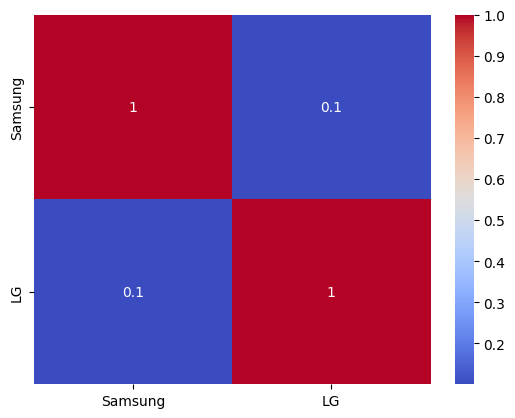

In [15]:
#히트맵 그리기
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()
#삼성과 LG는 서로 상관관계가 없다.